In [1]:
from tools.data_process import MyDataSet,MyDataLoader
from tools.metric import AccuracyMulti
from tools.models import MyCNN
from tools.optimizer import MomentumOpt,SGDopt
from tools.runners import Runner
from tools.plot_util import plot_training_loss_acc
from torchvision.datasets import CIFAR10
import numpy as np


In [2]:
# 参数设置
batch_size = 128
eval_batch_size = 512
train_rate = 0.9
num_channel = 3
num_classify = 10
if_shuffle = True
opt_type = 0


In [3]:
data_path = './data/'
main_data=CIFAR10(data_path)
test_data=CIFAR10(data_path,train=False)

# 数据集分割
data_len=len(main_data)
train_len=int(train_rate*data_len)
index_shf = np.arange(data_len)
np.random.shuffle(index_shf)
index_train, index_dev = index_shf[:train_len], index_shf[train_len:]
main_data_pics = main_data.data.transpose(0,  3, 1, 2)
test_data_pics = test_data.data.transpose(0,  3, 1, 2)
main_data_targets = np.array(main_data.targets)
test_data_targets = np.array(test_data.targets)



# Dataset类封装
train_set = MyDataSet(main_data_pics[index_train], main_data_targets[index_train])
dev_set = MyDataSet(main_data_pics[index_dev], main_data_targets[index_dev])
test_set = MyDataSet(test_data_pics, test_data_targets)

# DataLoader封装
train_loader=MyDataLoader(train_set,batch_size=batch_size,shuffle=if_shuffle)
dev_loader=MyDataLoader(dev_set,batch_size=eval_batch_size)
test_loader=MyDataLoader(test_set,batch_size=eval_batch_size)
print('load done!')


load done!


In [4]:
# 参数设置
l_r = 1e-3
    
num_epochs = 5
log_steps = 0.1
eval_steps = 0.1
log_first = True
eval_first = True
eval_last = True
test_log = True



In [5]:
# 模型,优化器,正确率评价

class_size=10
model = MyCNN(num_channel, num_classify, l_r)
if opt_type==0:
    optimizer = SGDopt(learning_rate=l_r, model=model)
else:
    optimizer=MomentumOpt(learning_rate=l_r,model=model)
metric=AccuracyMulti()


In [6]:
%%time

# 模型训练
runner=Runner(model,optimizer,metric)
test_loss, test_score=runner.train(train_loader,dev_loader,test_loader,num_epochs=num_epochs,
             log_steps=log_steps,eval_steps=eval_steps,log_first=log_first,
             eval_first=eval_first,eval_last=eval_last,test_log=test_log)


[Dev] steps: 0/1760, dev_score: 0.0910
[Train] epochs: 1/5, steps: 1/1760 
	train loss: 14.3634
[Train] epochs: 1/5, steps: 176/1760 
	train loss: 11.7750
[Dev] steps: 176/1760, dev_score: 0.2068
[Train] epochs: 1/5, steps: 352/1760 
	train loss: 12.0306
[Dev] steps: 352/1760, dev_score: 0.1894
[Train] epochs: 2/5, steps: 528/1760 
	train loss: 12.0245
[Dev] steps: 528/1760, dev_score: 0.2242
[Train] epochs: 2/5, steps: 704/1760 
	train loss: 10.6396
[Dev] steps: 704/1760, dev_score: 0.2276
[Train] epochs: 3/5, steps: 880/1760 
	train loss: 11.2053
[Dev] steps: 880/1760, dev_score: 0.2470
[Train] epochs: 3/5, steps: 1056/1760 
	train loss: 10.1117
[Dev] steps: 1056/1760, dev_score: 0.2530
[Train] epochs: 4/5, steps: 1232/1760 
	train loss: 9.7472
[Dev] steps: 1232/1760, dev_score: 0.2784
[Train] epochs: 4/5, steps: 1408/1760 
	train loss: 11.1251
[Dev] steps: 1408/1760, dev_score: 0.2534
[Train] epochs: 5/5, steps: 1584/1760 
	train loss: 9.1518
[Dev] steps: 1584/1760, dev_score: 0.281

fig saved !


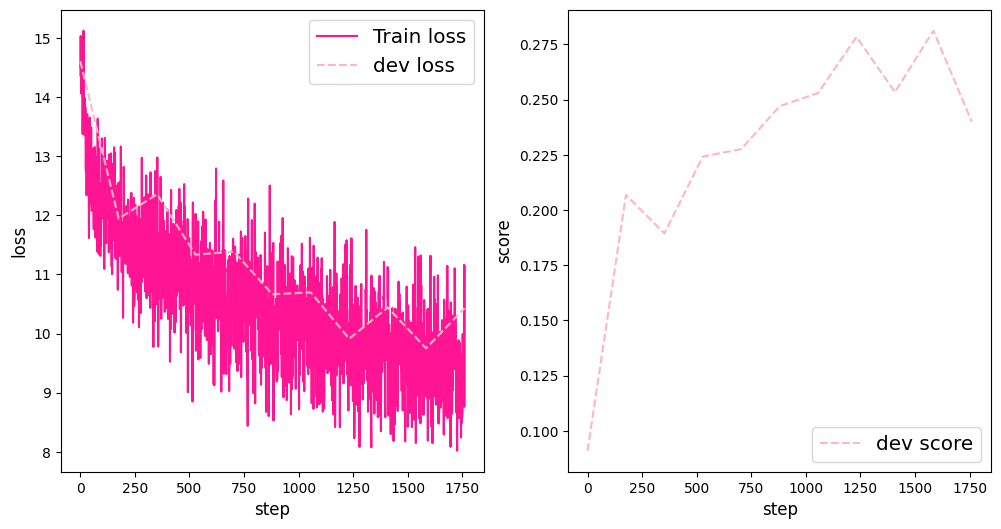

In [7]:
plot_training_loss_acc(runner, sample_step=1)



fig saved !


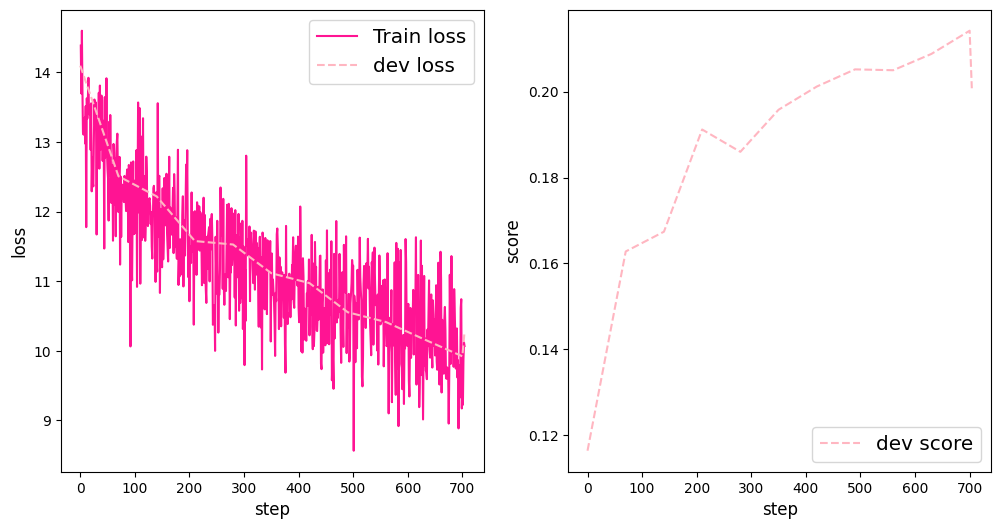

In [19]:

plot_training_loss_acc(runner, sample_step=1)
